In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM, Reshape, Embedding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv('/content/Final_News_DF_Labeled_ExamDataset (1).csv')

In [12]:
df

,LABEL,according,agency,ahead,alabama,amazon,america,american,announced,appeared,...,wolverines,women,work,working,world,wrote,year,years,york,young
0,politics,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,science,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1489,science,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,science,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1491,science,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
features = df.drop(columns=['LABEL']).to_numpy()
labels = df['LABEL']

onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoded = onehot_encoder.fit_transform(labels.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(features, onehot_encoded, test_size=0.2, random_state=42, shuffle=True)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
data = df.drop(columns=['LABEL']).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, shuffle=True)

In [18]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               38528     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 46979 (183.51 KB)
Trainable params: 46979 (183.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
ann_history=ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
38/38 [==============================] - 1s 8ms/step - loss: 1.0269 - accuracy: 0.4950 - val_loss: 0.9186 - val_accuracy: 0.6756
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.7930 - accuracy: 0.7320 - val_loss: 0.6831 - val_accuracy: 0.7692
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.5484 - accuracy: 0.8057 - val_loss: 0.5818 - val_accuracy: 0.7659
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 0.4171 - accuracy: 0.8384 - val_loss: 0.5919 - val_accuracy: 0.7659
Epoch 5/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3466 - accuracy: 0.8652 - val_loss: 0.6177 - val_accuracy: 0.7759
Epoch 6/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2890 - accuracy: 0.8819 - val_loss: 0.6551 - val_accuracy: 0.7592
Epoch 7/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2555 - accuracy: 0.8953 - val_loss: 0.7008 - val_accuracy: 0.7692
Epoch 8/10
38/38 [==

In [25]:
loss, accuracy = ann_model.evaluate(X_test,y_test)
print(f'ANN Test Loss: {loss:.4f}, ANN Test Accuracy: {accuracy:.4f}')

10/10 [==============================] - 0s 2ms/step - loss: 0.8521 - accuracy: 0.7659
ANN Test Loss: 0.8521, ANN Test Accuracy: 0.7659


In [26]:
cnn_model = Sequential([
    Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    Conv1D(64, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(3, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history=cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
38/38 [==============================] - 1s 14ms/step - loss: 0.9185 - accuracy: 0.6231 - val_loss: 0.7588 - val_accuracy: 0.7358
Epoch 2/10
38/38 [==============================] - 0s 10ms/step - loss: 0.6542 - accuracy: 0.7973 - val_loss: 0.6258 - val_accuracy: 0.7659
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 0.5328 - accuracy: 0.8007 - val_loss: 0.5824 - val_accuracy: 0.7692
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 0.4707 - accuracy: 0.8216 - val_loss: 0.5831 - val_accuracy: 0.7759
Epoch 5/10
38/38 [==============================] - 1s 13ms/step - loss: 0.4345 - accuracy: 0.8291 - val_loss: 0.5977 - val_accuracy: 0.7826
Epoch 6/10
38/38 [==============================] - 1s 19ms/step - loss: 0.4068 - accuracy: 0.8358 - val_loss: 0.6194 - val_accuracy: 0.7759
Epoch 7/10
38/38 [==============================] - 1s 24ms/step - loss: 0.3866 - accuracy: 0.8476 - val_loss: 0.6452 - val_accuracy: 0.7726
Epoch 8/10
38/3

In [28]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 300, 1)            0         
                                                                 
 conv1d (Conv1D)             (None, 298, 64)           256       
                                                                 
 flatten (Flatten)           (None, 19072)             0         
                                                                 
 dense_3 (Dense)             (None, 3)                 57219     
                                                                 
Total params: 57475 (224.51 KB)
Trainable params: 57475 (224.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
loss, accuracy = cnn_model.evaluate(X_test,y_test)
print(f'CNN Test Loss: {loss:.4f}, CNN Test Accuracy: {accuracy:.4f}')

10/10 [==============================] - 0s 3ms/step - loss: 0.7393 - accuracy: 0.7659
CNN Test Loss: 0.7393, CNN Test Accuracy: 0.7659


In [29]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=X_train.shape[1], output_dim=128, input_length=X_train.shape[1]))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(3, activation='softmax'))
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_history=lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
38/38 [==============================] - 20s 459ms/step - loss: 1.1016 - accuracy: 0.3166 - val_loss: 1.0975 - val_accuracy: 0.3311
Epoch 2/10
38/38 [==============================] - 13s 355ms/step - loss: 1.0986 - accuracy: 0.3451 - val_loss: 1.0972 - val_accuracy: 0.3378
Epoch 3/10
38/38 [==============================] - 8s 214ms/step - loss: 1.0966 - accuracy: 0.3526 - val_loss: 1.0915 - val_accuracy: 0.3980
Epoch 4/10
38/38 [==============================] - 9s 234ms/step - loss: 1.0805 - accuracy: 0.3844 - val_loss: 1.0455 - val_accuracy: 0.4114
Epoch 5/10
38/38 [==============================] - 7s 190ms/step - loss: 1.0598 - accuracy: 0.4028 - val_loss: 1.0153 - val_accuracy: 0.4883
Epoch 6/10
38/38 [==============================] - 9s 227ms/step - loss: 1.0442 - accuracy: 0.4355 - val_loss: 1.0072 - val_accuracy: 0.4281
Epoch 7/10
38/38 [==============================] - 9s 233ms/step - loss: 1.0256 - accuracy: 0.4489 - val_loss: 0.9929 - val_accuracy: 0.5050
Epoc

In [30]:
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          38400     
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 88003 (343.76 KB)
Trainable params: 88003 (343.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
loss, accuracy = lstm_model.evaluate(X_test,y_test)
print(f'LSTM Test Loss: {loss:.4f}, LSTM Test Accuracy: {accuracy:.4f}')

10/10 [==============================] - 0s 41ms/step - loss: 0.9843 - accuracy: 0.5217
LSTM Test Loss: 0.9843, LSTM Test Accuracy: 0.5217


In [42]:
ann_predictions = np.argmax(ann_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1)), axis=1)
cnn_predictions = np.argmax(cnn_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1)), axis=1)
lstm_predictions = np.argmax(lstm_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1)), axis=1)

10/10 [==============================] - 1s 40ms/step


In [43]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['LABEL'])

In [44]:
ann_predictions_labels = label_encoder.inverse_transform(ann_predictions)
cnn_predictions_labels = label_encoder.inverse_transform(cnn_predictions)
lstm_predictions_labels = label_encoder.inverse_transform(lstm_predictions)

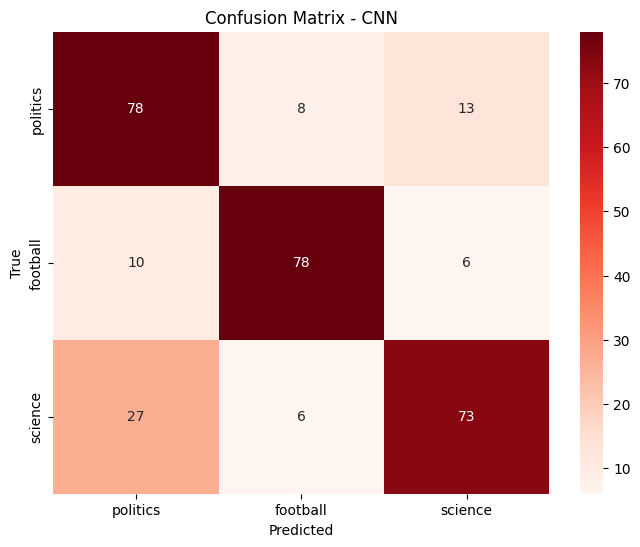

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(label_encoder.inverse_transform(np.argmax(y_test, axis=1)), cnn_predictions_labels, labels=['politics', 'football', 'science'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['politics', 'football', 'science'], yticklabels=['politics', 'football', 'science'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - CNN')
plt.show()

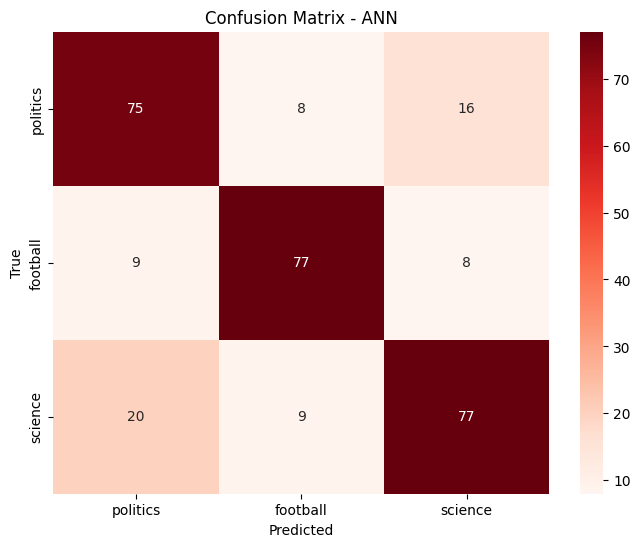

In [41]:
cm = confusion_matrix(label_encoder.inverse_transform(np.argmax(y_test, axis=1)), ann_predictions_labels, labels=['politics', 'football', 'science'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['politics', 'football', 'science'], yticklabels=['politics', 'football', 'science'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - ANN')
plt.show()

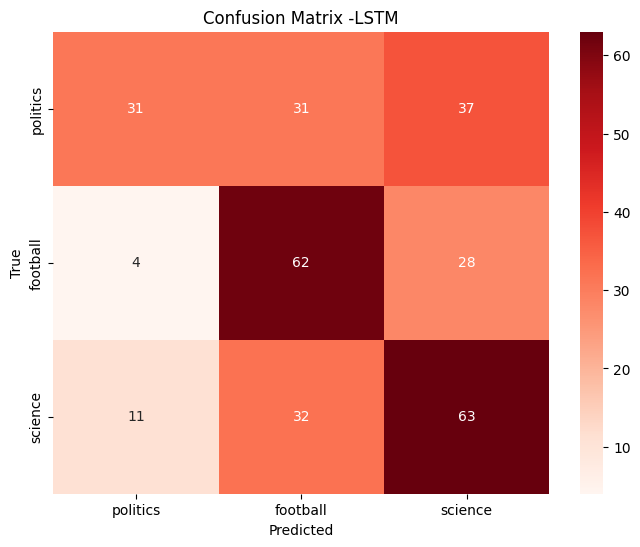

In [45]:
cm = confusion_matrix(label_encoder.inverse_transform(np.argmax(y_test, axis=1)), lstm_predictions_labels, labels=['politics', 'football', 'science'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['politics', 'football', 'science'], yticklabels=['politics', 'football', 'science'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix -LSTM')
plt.show()

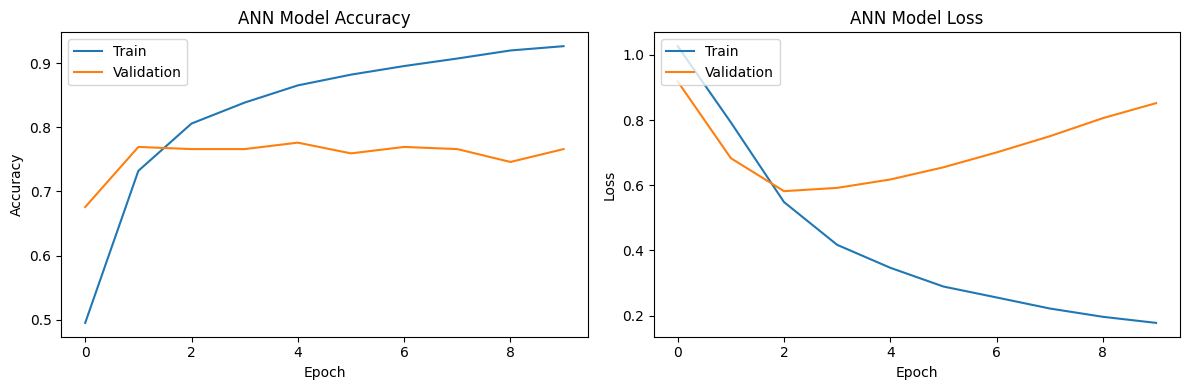

In [46]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'])
plt.plot(ann_history.history['val_accuracy'])
plt.title('ANN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'])
plt.plot(ann_history.history['val_loss'])
plt.title('ANN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

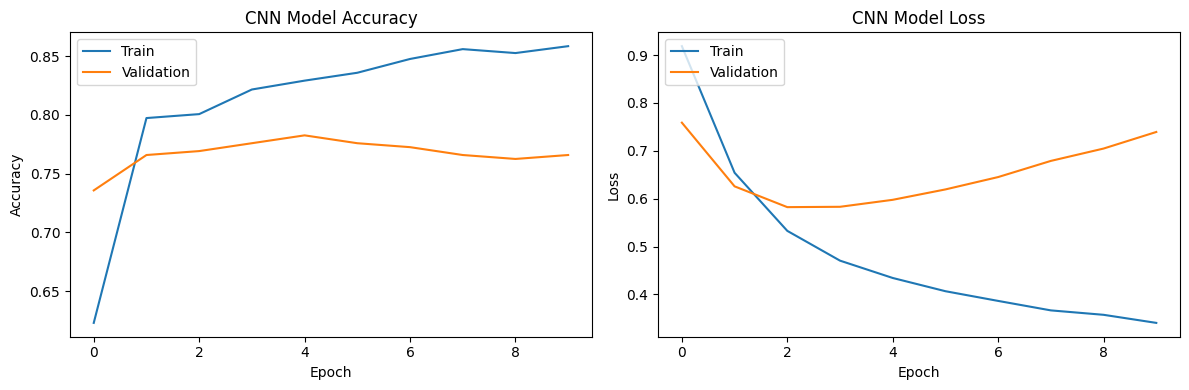

In [47]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

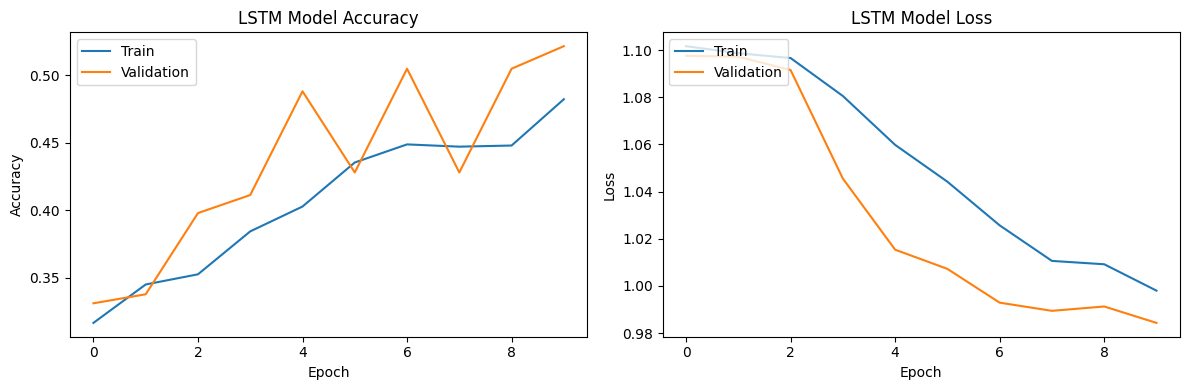

In [48]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()